In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# HSV Color Space

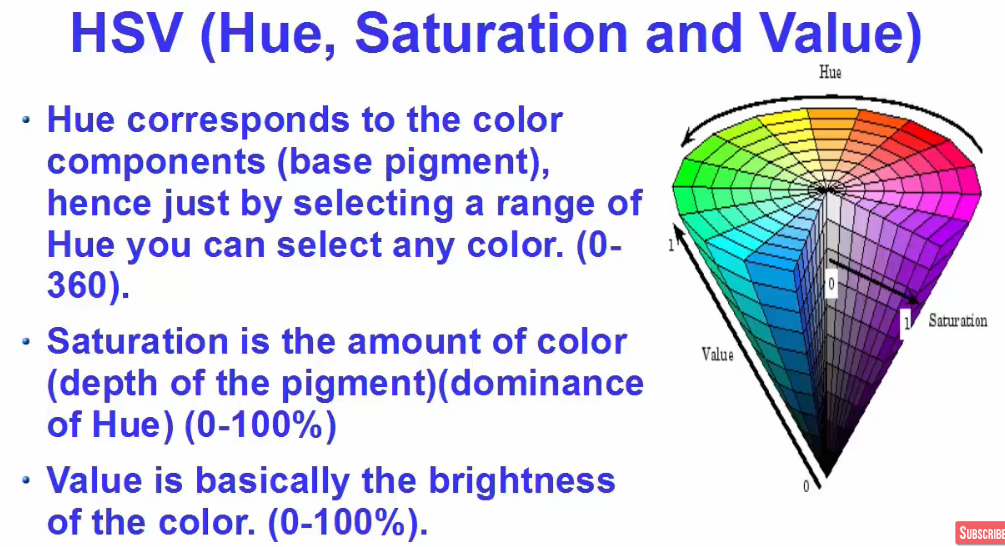

- The problem with RGB notation is that we cannot separate illuminance in RGB format, so we have to use HSV representation

# Object Detection Using HSV Color Space in images

In [3]:
hsv_lower = np.array([0,0,0])
hsv_upper = np.array([255,255,255])

def update_images():
    img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(img_hsv,hsv_lower,hsv_upper)

    masked_image = cv2.bitwise_and(img,img,mask = mask)

    cv2.imshow('Image_window',img)
    cv2.imshow('Mask_window',mask)
    cv2.imshow('Detection_window',masked_image)

def func_h_lower(pos):
    hsv_lower[0] = pos
    update_images()

def func_s_lower(pos):
    hsv_lower[1] = pos
    update_images()

def func_v_lower(pos):
    hsv_lower[2] = pos
    update_images()

def func_h_higher(pos):
    hsv_upper[0] = pos
    update_images()

def func_s_higher(pos):
    hsv_upper[1] = pos
    update_images()

def func_v_higher(pos):
    hsv_upper[2] = pos
    update_images()

In [4]:
img = cv2.imread('./Images/09.jpg')

cv2.namedWindow('Trackbar_window')

cv2.createTrackbar('h_lower','Trackbar_window',0,180,func_h_lower)
cv2.createTrackbar('s_lower','Trackbar_window',0,255,func_s_lower)
cv2.createTrackbar('v_lower','Trackbar_window',0,255,func_v_lower)

cv2.createTrackbar('h_higher','Trackbar_window',180,180,func_h_higher)
cv2.createTrackbar('s_higher','Trackbar_window',255,255,func_s_higher)
cv2.createTrackbar('v_higher','Trackbar_window',255,255,func_v_higher)

img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) # converting the image from BGR format to HSV format
mask = cv2.inRange(img_hsv,hsv_lower,hsv_upper) # creating the mask variable which accepts objects between the hsv ranges provided

masked_image = cv2.bitwise_and(img,img,mask = mask) # masking

cv2.imshow('Image_window',img) # showing original image
cv2.imshow('Mask_window',mask) # showing masked image
cv2.imshow('Detection_window',masked_image) # showing the detected image

cv2.waitKey(0)
cv2.destroyAllWindows()

# Object Detection Using HSV Color Space in live video feed

In [5]:
hsv_lower = np.array([0,0,0])
hsv_upper = np.array([255,255,255])

def func_h_lower(pos):
    hsv_lower[0] = pos

def func_s_lower(pos):
    hsv_lower[1] = pos

def func_v_lower(pos):
    hsv_lower[2] = pos

def func_h_higher(pos):
    hsv_upper[0] = pos

def func_s_higher(pos):
    hsv_upper[1] = pos

def func_v_higher(pos):
    hsv_upper[2] = pos

In [6]:
cap = cv2.VideoCapture(0)

cv2.namedWindow('Trackbar_window')

cv2.createTrackbar('h_lower','Trackbar_window',0,180,func_h_lower)
cv2.createTrackbar('s_lower','Trackbar_window',0,255,func_s_lower)
cv2.createTrackbar('v_lower','Trackbar_window',0,255,func_v_lower)

cv2.createTrackbar('h_higher','Trackbar_window',180,180,func_h_higher)
cv2.createTrackbar('s_higher','Trackbar_window',255,255,func_s_higher)
cv2.createTrackbar('v_higher','Trackbar_window',255,255,func_v_higher)

while cap.isOpened():
    res,frame = cap.read()
    if res:
        frame_hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(frame_hsv,hsv_lower,hsv_upper)
    
        masked_image = cv2.bitwise_and(frame,frame,mask = mask)

        cv2.imshow('Image_window',frame)
        cv2.imshow('Mask_window',mask)
        cv2.imshow('Detection_window',masked_image)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        
    else:
        break

cap.release()
cv2.destroyAllWindows()